In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

import sklearn
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Cifar10-valid

## Subset 4

In [18]:
df_whole = pd.read_csv('/home/gean/nns_performance_prediction/meta_datasets/nasbench201_cifar10valid_4epochs.csv', 
                       index_col=0)
df_whole = df_whole.reset_index(drop=True)
df_whole.head()

,id_arch,str_arch,layers_all,adjacency_matrix,dataset,epoch,conv_num_layers,conv_kernel_min,conv_kernel_max,conv_kernel_mode,...,latency,time_train,time_valid,time_test,loss_train,loss_valid,loss_test,acc_train,acc_valid,acc_test
0,0,|avg_pool_3x3~0|+|nor_conv_1x1~0|skip_connect~...,"['avg_pool_3x3', 'nor_conv_1x1', 'skip_connect...",[[0. 0. 0. 0.]\n [4. 0. 0. 0.]\n [2. 1. 0. 0.]...,cifar10-valid,4,2,1,1,1,...,0.013936,28.884372,10.195917,NaN,1.504583,1.919403,NaN,44.164000,35.352000,NaN
1,1,|nor_conv_3x3~0|+|nor_conv_3x3~0|avg_pool_3x3~...,"['nor_conv_3x3', 'nor_conv_3x3', 'avg_pool_3x3...",[[0. 0. 0. 0.]\n [3. 0. 0. 0.]\n [3. 4. 0. 0.]...,cifar10-valid,4,3,3,3,3,...,0.016853,43.392828,15.016796,NaN,0.943213,1.348791,NaN,66.194667,56.922667,NaN
2,2,|avg_pool_3x3~0|+|nor_conv_3x3~0|nor_conv_3x3~...,"['avg_pool_3x3', 'nor_conv_3x3', 'nor_conv_3x3...",[[0. 0. 0. 0.]\n [4. 0. 0. 0.]\n [3. 3. 0. 0.]...,cifar10-valid,4,2,3,3,3,...,0.014428,45.343554,15.896988,NaN,1.445244,1.637992,NaN,46.269333,42.048000,NaN
3,3,|avg_pool_3x3~0|+|skip_connect~0|none~1|+|none...,"['avg_pool_3x3', 'skip_connect', 'none', 'none...",[[0. 0. 0. 0.]\n [4. 0. 0. 0.]\n [1. 0. 0. 0.]...,cifar10-valid,4,0,0,0,0,...,0.009291,16.660980,9.746239,NaN,1.123983,1.399200,NaN,59.390667,53.446667,NaN
4,4,|skip_connect~0|+|skip_connect~0|nor_conv_1x1~...,"['skip_connect', 'skip_connect', 'nor_conv_1x1...",[[0. 0. 0. 0.]\n [1. 0. 0. 0.]\n [1. 2. 0. 0.]...,cifar10-valid,4,2,1,1,1,...,0.013826,25.937196,9.652641,NaN,1.532887,1.691920,NaN,42.745333,38.753333,NaN


In [19]:
df_whole.describe()

,id_arch,epoch,conv_num_layers,conv_kernel_min,conv_kernel_max,conv_kernel_mode,avg_pool_num_layers,skip_connection_num_layers,zeroize_num_layers,flops,...,latency,time_train,time_valid,time_test,loss_train,loss_valid,loss_test,acc_train,acc_valid,acc_test
count,15625.000000,15625.0,15625.000000,15625.000000,15625.000000,15625.000000,15625.000000,15625.000000,15625.000000,15625.000000,...,15625.000000,15625.000000,15625.000000,0.0,15625.000000,15625.000000,0.0,15625.000000,15625.000000,0.0
mean,7812.000000,4.0,2.400000,1.384320,2.429056,1.698048,1.200000,1.200000,1.200000,54.896534,...,0.015934,36.559738,12.644518,NaN,1.338416,1.607540,NaN,50.722257,44.831523,NaN
std,4510.693313,0.0,1.200038,0.872327,0.977722,1.024139,0.979827,0.979827,0.979827,33.828605,...,0.002836,9.433381,2.113756,NaN,0.260608,0.273353,NaN,10.552688,9.704240,NaN
min,0.000000,4.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.783050,...,0.007145,10.844619,7.022675,NaN,0.842560,0.939400,NaN,9.708000,9.797333,NaN
25%,3906.000000,4.0,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,19.579530,...,0.014283,29.783997,10.998609,NaN,1.158527,1.423965,NaN,45.209333,39.773333,NaN
50%,7812.000000,4.0,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,47.104650,...,0.015796,36.342496,12.577523,NaN,1.308636,1.589098,NaN,52.164000,45.644000,NaN
75%,11718.000000,4.0,3.000000,1.000000,3.000000,3.000000,2.000000,2.000000,2.000000,82.494090,...,0.017864,43.170739,14.079768,NaN,1.477722,1.754170,NaN,58.001333,51.204000,NaN
max,15624.000000,4.0,6.000000,3.000000,3.000000,3.000000,6.000000,6.000000,6.000000,220.119690,...,0.025579,69.216631,21.404098,NaN,2.303605,4.252969,NaN,69.738667,67.256000,NaN


In [20]:
y_np = df_whole['acc_valid'].to_numpy()

In [21]:
print("Mean: ", np.mean(y_np))
print("Median: ", np.median(y_np))
print("Q1: ", np.quantile(y_np, 0.25))
print("Q3: ", np.quantile(y_np, 0.75))

Mean:  44.831522941191324
Median:  45.64399998535156
Q1:  39.77333333780924
Q3:  51.20400000040689


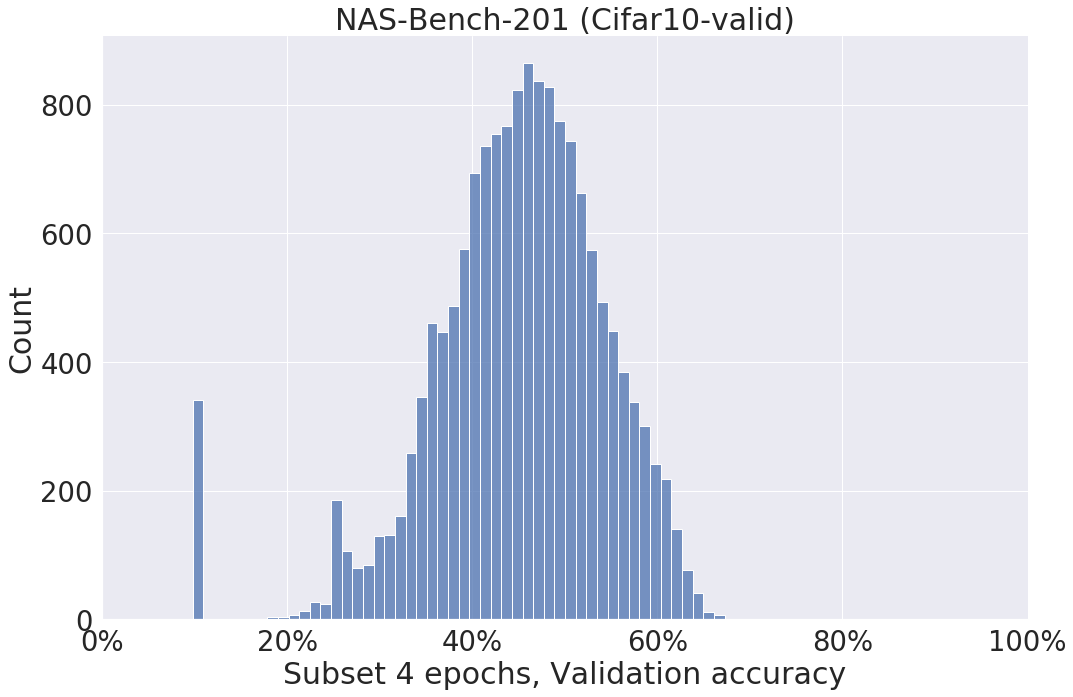

In [22]:
sns.set(font_scale=2.5)

ax = sns.displot(df_whole['acc_valid'], bins=50, height=10, aspect=15.7/10.27).set(xlim=(0, 100))
ax.set(xlabel='Subset 4 epochs, Validation accuracy')
ax.set_xticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
plt.title("NAS-Bench-201 (Cifar10-valid)")
ax.savefig("/home/gean/nns_performance_prediction/meta_datasets/nasbench201_cifar10valid_4epochs_val_acc_dist.pdf", 
           bbox_inches='tight')

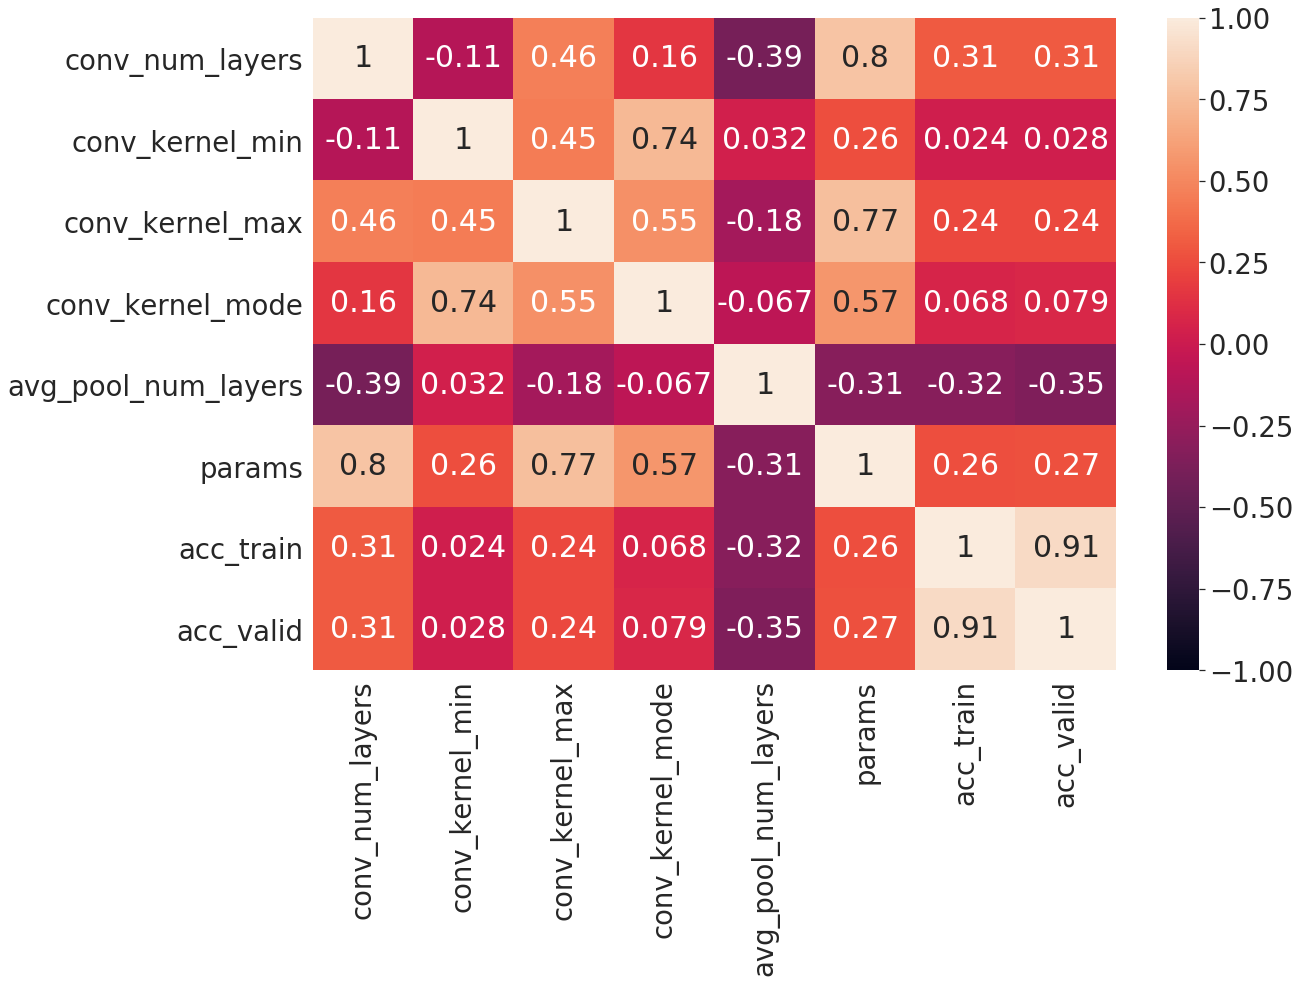

In [23]:
plt.figure(figsize=(18, 12))
df_aux = df_whole.drop(['id_arch', 'dataset', 'epoch', 'time_test', 'loss_test', 'acc_test', 'skip_connection_num_layers',
                       'zeroize_num_layers', 'flops', 'latency', 'time_train', 'time_valid', 'loss_train', 'loss_valid'], 
                       axis = 1)
sns.heatmap(df_aux.corr(method='spearman'), vmin=-1, vmax=1, annot=True)

plt.savefig("/home/gean/nns_performance_prediction/meta_datasets/nasbench201_cifar10valid_4epochs_features_spearman_corr.pdf", 
            transparent=True, bbox_inches='tight')  

## Subset 12

In [24]:
df_whole = pd.read_csv('/home/gean/nns_performance_prediction/meta_datasets/nasbench201_cifar10valid_12epochs.csv', 
                       index_col=0)
df_whole = df_whole.reset_index(drop=True)
df_whole.head()

,id_arch,str_arch,layers_all,adjacency_matrix,dataset,epoch,conv_num_layers,conv_kernel_min,conv_kernel_max,conv_kernel_mode,...,latency,time_train,time_valid,time_test,loss_train,loss_valid,loss_test,acc_train,acc_valid,acc_test
0,0,|avg_pool_3x3~0|+|nor_conv_1x1~0|skip_connect~...,"['avg_pool_3x3', 'nor_conv_1x1', 'skip_connect...",[[0. 0. 0. 0.]\n [4. 0. 0. 0.]\n [2. 1. 0. 0.]...,cifar10-valid,12,2,1,1,1,...,0.013936,86.653116,30.587751,NaN,1.166258,1.733641,NaN,57.962667,47.473333,NaN
1,1,|nor_conv_3x3~0|+|nor_conv_3x3~0|avg_pool_3x3~...,"['nor_conv_3x3', 'nor_conv_3x3', 'avg_pool_3x3...",[[0. 0. 0. 0.]\n [3. 0. 0. 0.]\n [3. 4. 0. 0.]...,cifar10-valid,12,3,3,3,3,...,0.016853,130.178483,45.050388,NaN,0.517074,0.904066,NaN,82.053333,71.120000,NaN
2,2,|avg_pool_3x3~0|+|nor_conv_3x3~0|nor_conv_3x3~...,"['avg_pool_3x3', 'nor_conv_3x3', 'nor_conv_3x3...",[[0. 0. 0. 0.]\n [4. 0. 0. 0.]\n [3. 3. 0. 0.]...,cifar10-valid,12,2,3,3,3,...,0.014428,136.030661,47.690964,NaN,1.122346,1.433284,NaN,59.389333,52.056000,NaN
3,3,|avg_pool_3x3~0|+|skip_connect~0|none~1|+|none...,"['avg_pool_3x3', 'skip_connect', 'none', 'none...",[[0. 0. 0. 0.]\n [4. 0. 0. 0.]\n [1. 0. 0. 0.]...,cifar10-valid,12,0,0,0,0,...,0.009291,49.982939,29.238718,NaN,0.795997,1.042909,NaN,71.880000,64.730667,NaN
4,4,|skip_connect~0|+|skip_connect~0|nor_conv_1x1~...,"['skip_connect', 'skip_connect', 'nor_conv_1x1...",[[0. 0. 0. 0.]\n [1. 0. 0. 0.]\n [1. 2. 0. 0.]...,cifar10-valid,12,2,1,1,1,...,0.013826,77.811589,28.957922,NaN,1.126775,2.333692,NaN,59.677333,41.796000,NaN


In [25]:
df_whole.describe()

,id_arch,epoch,conv_num_layers,conv_kernel_min,conv_kernel_max,conv_kernel_mode,avg_pool_num_layers,skip_connection_num_layers,zeroize_num_layers,flops,...,latency,time_train,time_valid,time_test,loss_train,loss_valid,loss_test,acc_train,acc_valid,acc_test
count,15625.000000,15625.0,15625.000000,15625.000000,15625.000000,15625.000000,15625.000000,15625.000000,15625.000000,15625.000000,...,15625.000000,15625.000000,15625.000000,0.0,15625.000000,15625.000000,0.0,15625.000000,15625.000000,0.0
mean,7812.000000,12.0,2.400000,1.384320,2.429056,1.698048,1.200000,1.200000,1.200000,54.896534,...,0.015934,109.679214,37.933554,NaN,0.929483,1.338374,NaN,66.629959,56.723846,NaN
std,4510.693313,0.0,1.200038,0.872327,0.977722,1.024139,0.979827,0.979827,0.979827,33.828605,...,0.002836,28.300142,6.341269,NaN,0.334925,0.415093,NaN,13.125751,12.922474,NaN
min,0.000000,12.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.783050,...,0.007145,32.533858,21.068024,NaN,0.458185,0.628773,NaN,9.821333,9.792000,NaN
25%,3906.000000,12.0,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,19.579530,...,0.014283,89.351992,32.995827,NaN,0.715205,1.050470,NaN,62.056000,50.498667,NaN
50%,7812.000000,12.0,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,47.104650,...,0.015796,109.027487,37.732570,NaN,0.845836,1.249651,NaN,69.932000,59.460000,NaN
75%,11718.000000,12.0,3.000000,1.000000,3.000000,3.000000,2.000000,2.000000,2.000000,82.494090,...,0.017864,129.512218,42.239305,NaN,1.055665,1.530161,NaN,74.892000,65.512000,NaN
max,15624.000000,12.0,6.000000,3.000000,3.000000,3.000000,6.000000,6.000000,6.000000,220.119690,...,0.025579,207.649892,64.212294,NaN,2.303570,5.096514,NaN,84.106667,78.906000,NaN


In [26]:
y_np = df_whole['acc_valid'].to_numpy()

In [27]:
print("Mean: ", np.mean(y_np))
print("Median: ", np.median(y_np))
print("Q1: ", np.quantile(y_np, 0.25))
print("Q3: ", np.quantile(y_np, 0.75))

Mean:  56.72384635283674
Median:  59.459999990234365
Q1:  50.498666669108076
Q3:  65.51199998901367


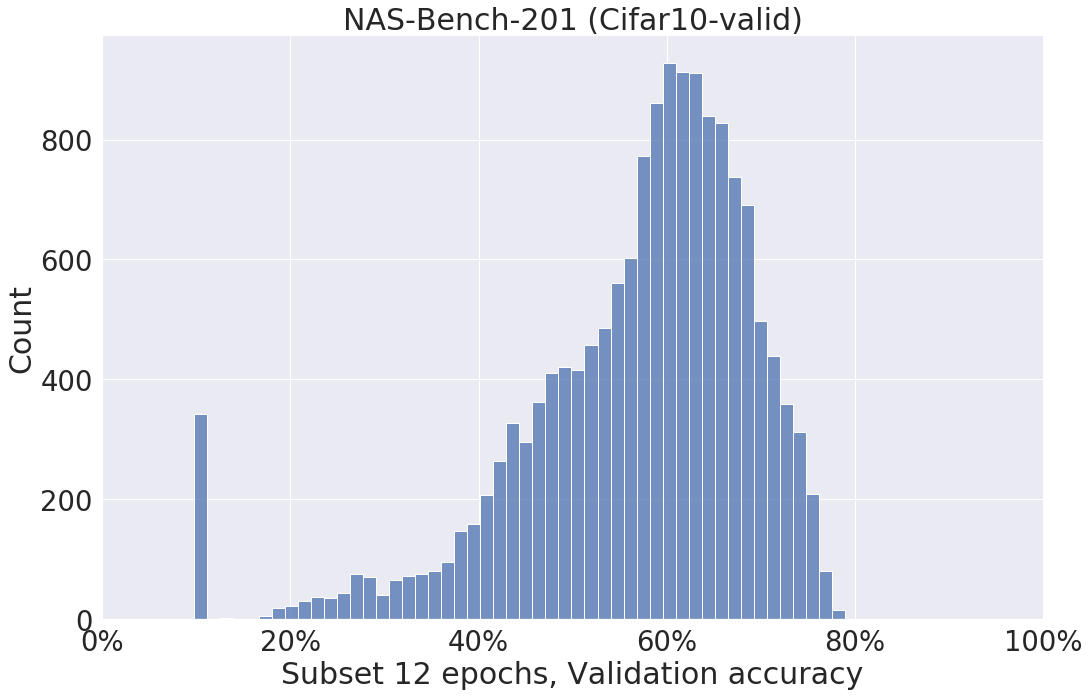

In [28]:
sns.set(font_scale=2.5)

ax = sns.displot(df_whole['acc_valid'], bins=50, height=10, aspect=15.7/10.27).set(xlim=(0, 100))
ax.set(xlabel='Subset 12 epochs, Validation accuracy')
ax.set_xticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
plt.title("NAS-Bench-201 (Cifar10-valid)")
ax.savefig("/home/gean/nns_performance_prediction/meta_datasets/nasbench201_cifar10valid_12epochs_val_acc_dist.pdf", 
           bbox_inches='tight')

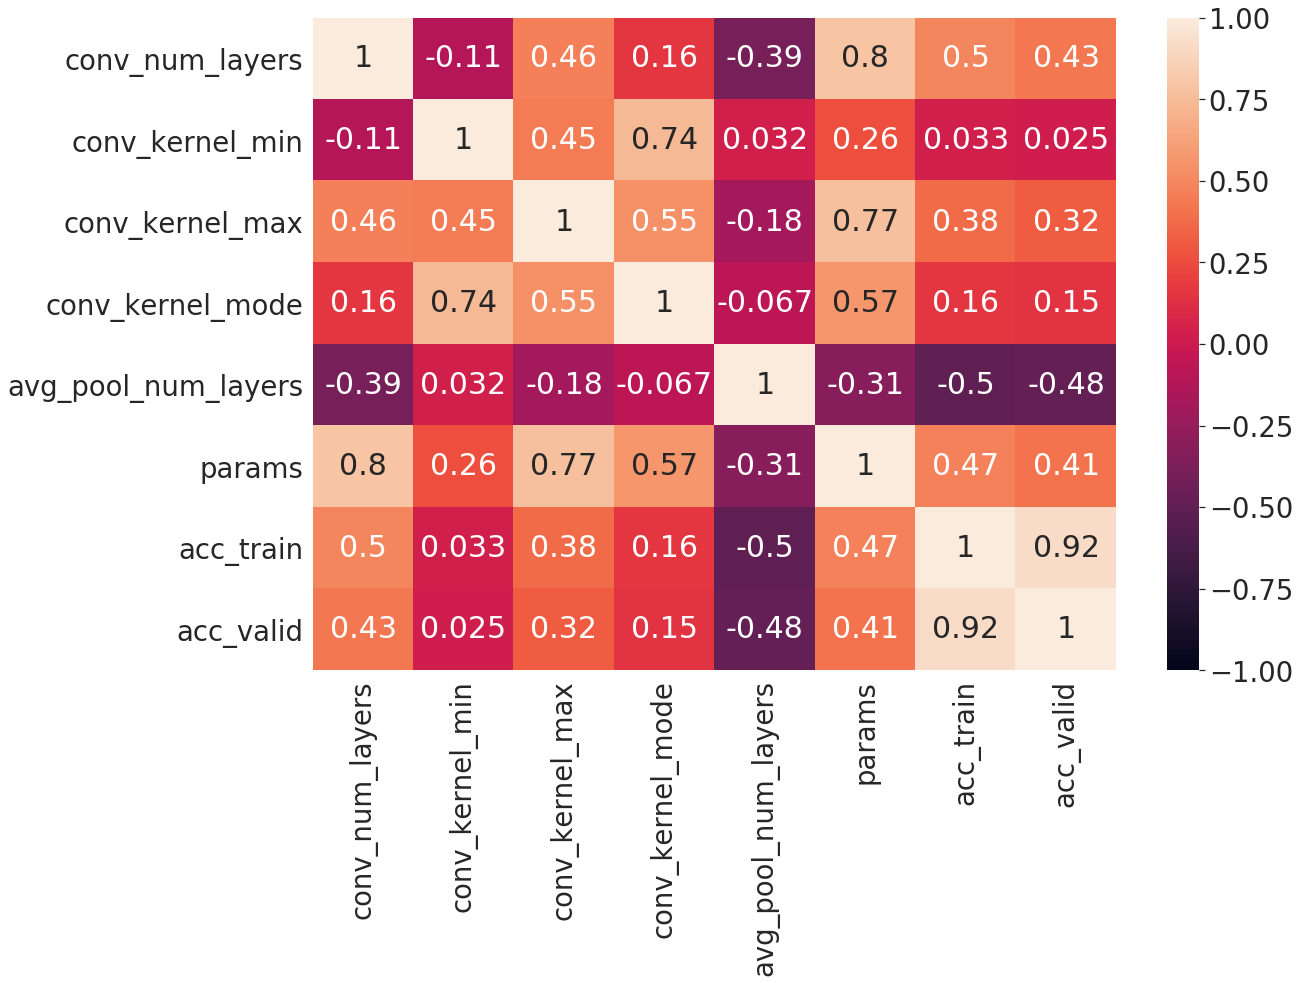

In [29]:
plt.figure(figsize=(18, 12))
df_aux = df_whole.drop(['id_arch', 'dataset', 'epoch', 'time_test', 'loss_test', 'acc_test', 'skip_connection_num_layers',
                       'zeroize_num_layers', 'flops', 'latency', 'time_train', 'time_valid', 'loss_train', 'loss_valid'], 
                       axis = 1)
ax = sns.heatmap(df_aux.corr(method='spearman'), vmin=-1, vmax=1, annot=True)

plt.savefig("/home/gean/nns_performance_prediction/meta_datasets/nasbench201_cifar10valid_12epochs_features_spearman_corr.pdf", 
            transparent=True, bbox_inches='tight')  

## Subset 36

In [30]:
df_whole = pd.read_csv('/home/gean/nns_performance_prediction/meta_datasets/nasbench201_cifar10valid_36epochs.csv', 
                       index_col=0)
df_whole = df_whole.reset_index(drop=True)
df_whole.head()

,id_arch,str_arch,layers_all,adjacency_matrix,dataset,epoch,conv_num_layers,conv_kernel_min,conv_kernel_max,conv_kernel_mode,...,latency,time_train,time_valid,time_test,loss_train,loss_valid,loss_test,acc_train,acc_valid,acc_test
0,0,|avg_pool_3x3~0|+|nor_conv_1x1~0|skip_connect~...,"['avg_pool_3x3', 'nor_conv_1x1', 'skip_connect...",[[0. 0. 0. 0.]\n [4. 0. 0. 0.]\n [2. 1. 0. 0.]...,cifar10-valid,36,2,1,1,1,...,0.013936,259.959348,91.763253,NaN,0.918740,1.617924,NaN,67.084000,52.174667,NaN
1,1,|nor_conv_3x3~0|+|nor_conv_3x3~0|avg_pool_3x3~...,"['nor_conv_3x3', 'nor_conv_3x3', 'avg_pool_3x3...",[[0. 0. 0. 0.]\n [3. 0. 0. 0.]\n [3. 4. 0. 0.]...,cifar10-valid,36,3,3,3,3,...,0.016853,390.535448,135.151163,NaN,0.304653,0.609070,NaN,89.417333,81.345333,NaN
2,2,|avg_pool_3x3~0|+|nor_conv_3x3~0|nor_conv_3x3~...,"['avg_pool_3x3', 'nor_conv_3x3', 'nor_conv_3x3...",[[0. 0. 0. 0.]\n [4. 0. 0. 0.]\n [3. 3. 0. 0.]...,cifar10-valid,36,2,3,3,3,...,0.014428,408.091982,143.072891,NaN,0.906255,1.267598,NaN,67.580000,58.481333,NaN
3,3,|avg_pool_3x3~0|+|skip_connect~0|none~1|+|none...,"['avg_pool_3x3', 'skip_connect', 'none', 'none...",[[0. 0. 0. 0.]\n [4. 0. 0. 0.]\n [1. 0. 0. 0.]...,cifar10-valid,36,0,0,0,0,...,0.009291,149.948818,87.716155,NaN,0.585472,0.861307,NaN,79.673333,71.952000,NaN
4,4,|skip_connect~0|+|skip_connect~0|nor_conv_1x1~...,"['skip_connect', 'skip_connect', 'nor_conv_1x1...",[[0. 0. 0. 0.]\n [1. 0. 0. 0.]\n [1. 2. 0. 0.]...,cifar10-valid,36,2,1,1,1,...,0.013826,233.434766,86.873766,NaN,0.878979,1.272511,NaN,68.950667,58.974667,NaN


In [31]:
df_whole.describe()

,id_arch,epoch,conv_num_layers,conv_kernel_min,conv_kernel_max,conv_kernel_mode,avg_pool_num_layers,skip_connection_num_layers,zeroize_num_layers,flops,...,latency,time_train,time_valid,time_test,loss_train,loss_valid,loss_test,acc_train,acc_valid,acc_test
count,15625.000000,15625.0,15625.000000,15625.000000,15625.000000,15625.000000,15625.000000,15625.000000,15625.000000,15625.000000,...,15625.000000,15625.000000,15625.000000,0.0,15625.000000,15625.000000,0.0,15625.000000,15625.000000,0.0
mean,7812.000000,36.0,2.400000,1.384320,2.429056,1.698048,1.200000,1.200000,1.200000,54.896534,...,0.015934,329.037643,113.800662,NaN,0.666024,1.226725,NaN,76.333776,64.252477,NaN
std,4510.693313,0.0,1.200038,0.872327,0.977722,1.024139,0.979827,0.979827,0.979827,33.828605,...,0.002836,84.900426,19.023808,NaN,0.371165,0.876103,NaN,14.311577,15.240867,NaN
min,0.000000,36.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.783050,...,0.007145,97.601574,63.204073,NaN,0.263146,0.500549,NaN,9.770667,9.712000,NaN
25%,3906.000000,36.0,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,19.579530,...,0.014283,268.055976,98.987482,NaN,0.445364,0.829258,NaN,73.806000,59.134667,NaN
50%,7812.000000,36.0,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,47.104650,...,0.015796,327.082461,113.197709,NaN,0.545263,0.995294,NaN,81.008000,69.274667,NaN
75%,11718.000000,36.0,3.000000,1.000000,3.000000,3.000000,2.000000,2.000000,2.000000,82.494090,...,0.017864,388.536653,126.717915,NaN,0.741704,1.335585,NaN,84.550000,74.082667,NaN
max,15624.000000,36.0,6.000000,3.000000,3.000000,3.000000,6.000000,6.000000,6.000000,220.119690,...,0.025579,622.949677,192.636882,NaN,2.303675,24.927949,NaN,90.810667,83.688000,NaN


In [32]:
y_np = df_whole['acc_valid'].to_numpy()

In [33]:
print("Mean: ", np.mean(y_np))
print("Median: ", np.median(y_np))
print("Q1: ", np.quantile(y_np, 0.25))
print("Q3: ", np.quantile(y_np, 0.75))

Mean:  64.25247653933958
Median:  69.27466666829427
Q1:  59.13466664916992
Q3:  74.08266666748047


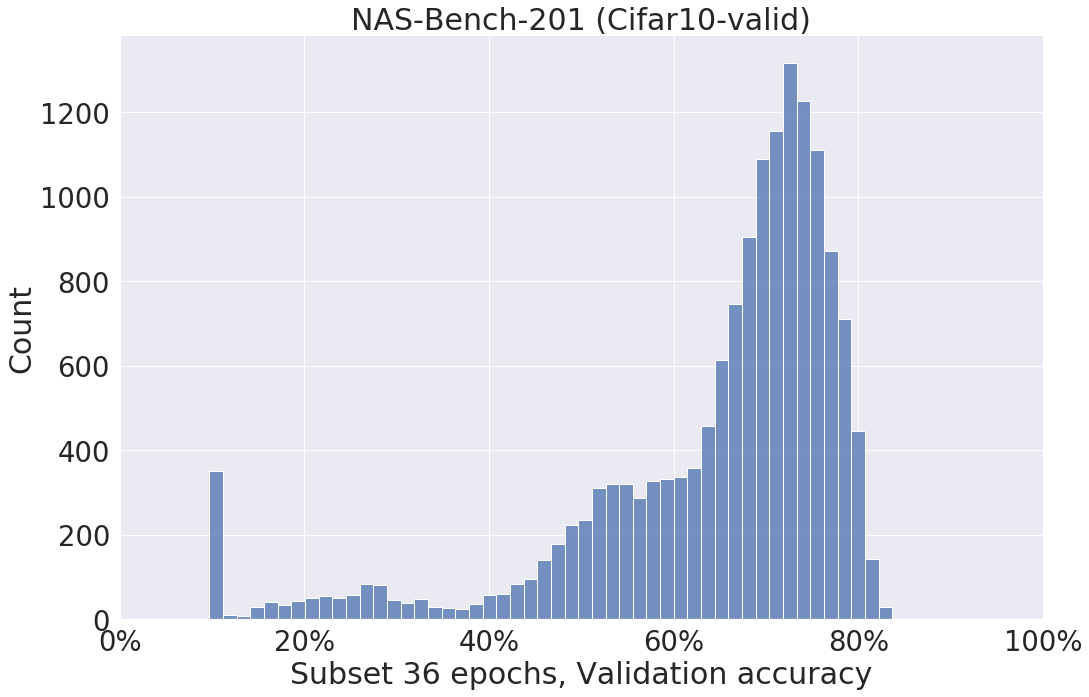

In [34]:
sns.set(font_scale=2.5)

ax = sns.displot(df_whole['acc_valid'], bins=50, height=10, aspect=15.7/10.27).set(xlim=(0, 100))
ax.set(xlabel='Subset 36 epochs, Validation accuracy')
ax.set_xticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
plt.title("NAS-Bench-201 (Cifar10-valid)")
ax.savefig("/home/gean/nns_performance_prediction/meta_datasets/nasbench201_cifar10valid_36epochs_val_acc_dist.pdf",
           bbox_inches='tight')

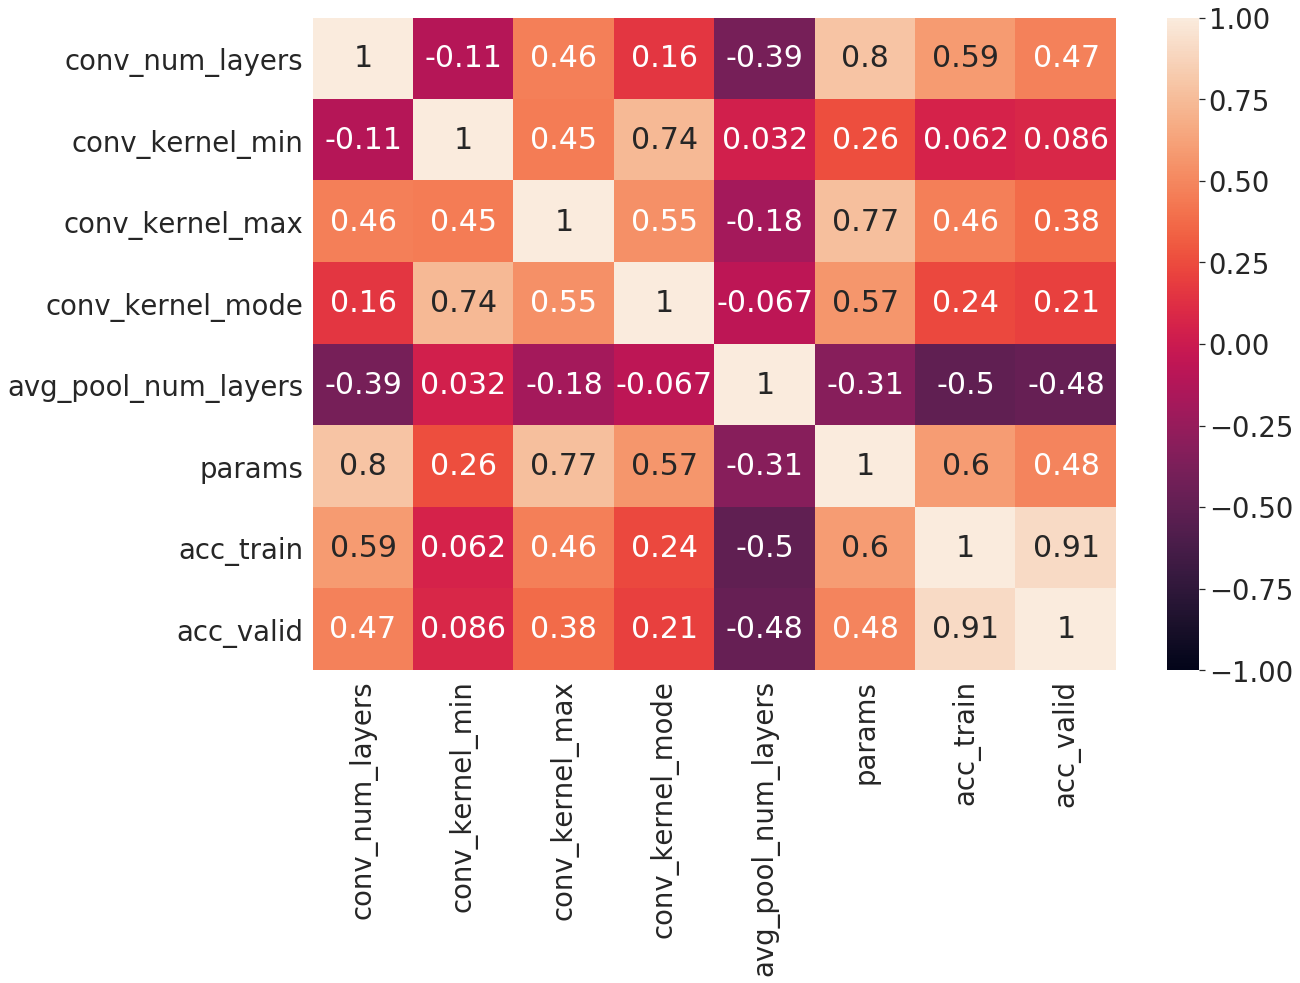

In [35]:
plt.figure(figsize=(18, 12))
df_aux = df_whole.drop(['id_arch', 'dataset', 'epoch', 'time_test', 'loss_test', 'acc_test', 'skip_connection_num_layers',
                       'zeroize_num_layers', 'flops', 'latency', 'time_train', 'time_valid', 'loss_train', 'loss_valid'], 
                       axis = 1)
sns.heatmap(df_aux.corr(method='spearman'), vmin=-1, vmax=1, annot=True)

plt.savefig("/home/gean/nns_performance_prediction/meta_datasets/nasbench201_cifar10valid_36epochs_features_spearman_corr.pdf", 
            transparent=True, bbox_inches='tight')  

## Subset 108

In [36]:
df_whole = pd.read_csv('/home/gean/nns_performance_prediction/meta_datasets/nasbench201_cifar10valid_108epochs.csv', 
                       index_col=0)
df_whole = df_whole.reset_index(drop=True)
df_whole.head()

,id_arch,str_arch,layers_all,adjacency_matrix,dataset,epoch,conv_num_layers,conv_kernel_min,conv_kernel_max,conv_kernel_mode,...,latency,time_train,time_valid,time_test,loss_train,loss_valid,loss_test,acc_train,acc_valid,acc_test
0,0,|avg_pool_3x3~0|+|nor_conv_1x1~0|skip_connect~...,"['avg_pool_3x3', 'nor_conv_1x1', 'skip_connect...",[[0. 0. 0. 0.]\n [4. 0. 0. 0.]\n [2. 1. 0. 0.]...,cifar10-valid,108,2,1,1,1,...,0.013936,779.878044,275.289758,NaN,0.672449,1.199783,NaN,76.168000,61.862667,NaN
1,1,|nor_conv_3x3~0|+|nor_conv_3x3~0|avg_pool_3x3~...,"['nor_conv_3x3', 'nor_conv_3x3', 'avg_pool_3x3...",[[0. 0. 0. 0.]\n [3. 0. 0. 0.]\n [3. 4. 0. 0.]...,cifar10-valid,108,3,3,3,3,...,0.016853,1171.606343,405.453490,NaN,0.107930,0.553529,NaN,96.238667,85.300000,NaN
2,2,|avg_pool_3x3~0|+|nor_conv_3x3~0|nor_conv_3x3~...,"['avg_pool_3x3', 'nor_conv_3x3', 'nor_conv_3x3...",[[0. 0. 0. 0.]\n [4. 0. 0. 0.]\n [3. 3. 0. 0.]...,cifar10-valid,108,2,3,3,3,...,0.014428,1224.275946,429.218674,NaN,0.654087,1.100213,NaN,76.984000,66.318667,NaN
3,3,|avg_pool_3x3~0|+|skip_connect~0|none~1|+|none...,"['avg_pool_3x3', 'skip_connect', 'none', 'none...",[[0. 0. 0. 0.]\n [4. 0. 0. 0.]\n [1. 0. 0. 0.]...,cifar10-valid,108,0,0,0,0,...,0.009291,449.846453,263.148464,NaN,0.439160,0.706246,NaN,84.897333,77.261333,NaN
4,4,|skip_connect~0|+|skip_connect~0|nor_conv_1x1~...,"['skip_connect', 'skip_connect', 'nor_conv_1x1...",[[0. 0. 0. 0.]\n [1. 0. 0. 0.]\n [1. 2. 0. 0.]...,cifar10-valid,108,2,1,1,1,...,0.013826,700.304299,260.621299,NaN,0.600910,1.035180,NaN,79.178667,68.078667,NaN


In [37]:
df_whole.describe()

,id_arch,epoch,conv_num_layers,conv_kernel_min,conv_kernel_max,conv_kernel_mode,avg_pool_num_layers,skip_connection_num_layers,zeroize_num_layers,flops,...,latency,time_train,time_valid,time_test,loss_train,loss_valid,loss_test,acc_train,acc_valid,acc_test
count,15625.000000,15625.0,15625.000000,15625.000000,15625.000000,15625.000000,15625.000000,15625.000000,15625.000000,15625.000000,...,15625.000000,15625.000000,15625.000000,0.0,15625.000000,15625.000000,0.0,15625.000000,15625.000000,0.0
mean,7812.000000,108.0,2.400000,1.384320,2.429056,1.698048,1.200000,1.200000,1.200000,54.896534,...,0.015934,987.112930,341.401985,NaN,0.418257,1.043344,NaN,85.080399,72.441808,NaN
std,4510.693313,0.0,1.200038,0.872327,0.977722,1.024139,0.979827,0.979827,0.979827,33.828605,...,0.002836,254.701279,57.071424,NaN,0.389535,1.086211,NaN,14.841300,16.818606,NaN
min,0.000000,108.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.783050,...,0.007145,292.804723,189.612219,NaN,0.087457,0.446261,NaN,9.692000,9.712000,NaN
25%,3906.000000,108.0,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,19.579530,...,0.014283,804.167929,296.962445,NaN,0.201788,0.640623,NaN,84.418667,71.460000,NaN
50%,7812.000000,108.0,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,47.104650,...,0.015796,981.247383,339.593127,NaN,0.284305,0.725059,NaN,90.028000,78.666000,NaN
75%,11718.000000,108.0,3.000000,1.000000,3.000000,3.000000,2.000000,2.000000,2.000000,82.494090,...,0.017864,1165.609958,380.153745,NaN,0.448872,0.956251,NaN,92.956000,81.686000,NaN
max,15624.000000,108.0,6.000000,3.000000,3.000000,3.000000,6.000000,6.000000,6.000000,220.119690,...,0.025579,1868.849031,577.910647,NaN,2.303026,19.431763,NaN,97.138000,87.968000,NaN


In [38]:
y_np = df_whole['acc_valid'].to_numpy()

In [39]:
print("Mean: ", np.mean(y_np))
print("Median: ", np.median(y_np))
print("Q1: ", np.quantile(y_np, 0.25))
print("Q3: ", np.quantile(y_np, 0.75))

Mean:  72.44180816554677
Median:  78.66599998901367
Q1:  71.4600000024414
Q3:  81.6859999987793


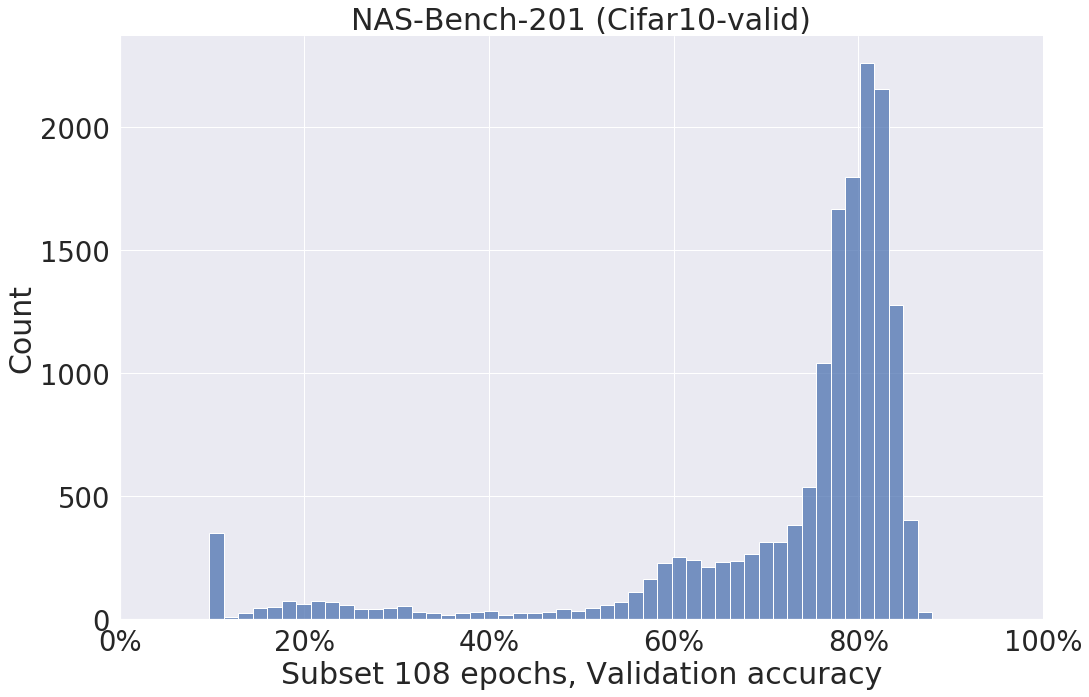

In [40]:
sns.set(font_scale=2.5)

ax = sns.displot(df_whole['acc_valid'], bins=50, height=10, aspect=15.7/10.27).set(xlim=(0, 100))
ax.set(xlabel='Subset 108 epochs, Validation accuracy')
ax.set_xticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
plt.title("NAS-Bench-201 (Cifar10-valid)")
ax.savefig("/home/gean/nns_performance_prediction/meta_datasets/nasbench201_cifar10valid_108epochs_val_acc_dist.pdf",
           bbox_inches='tight')

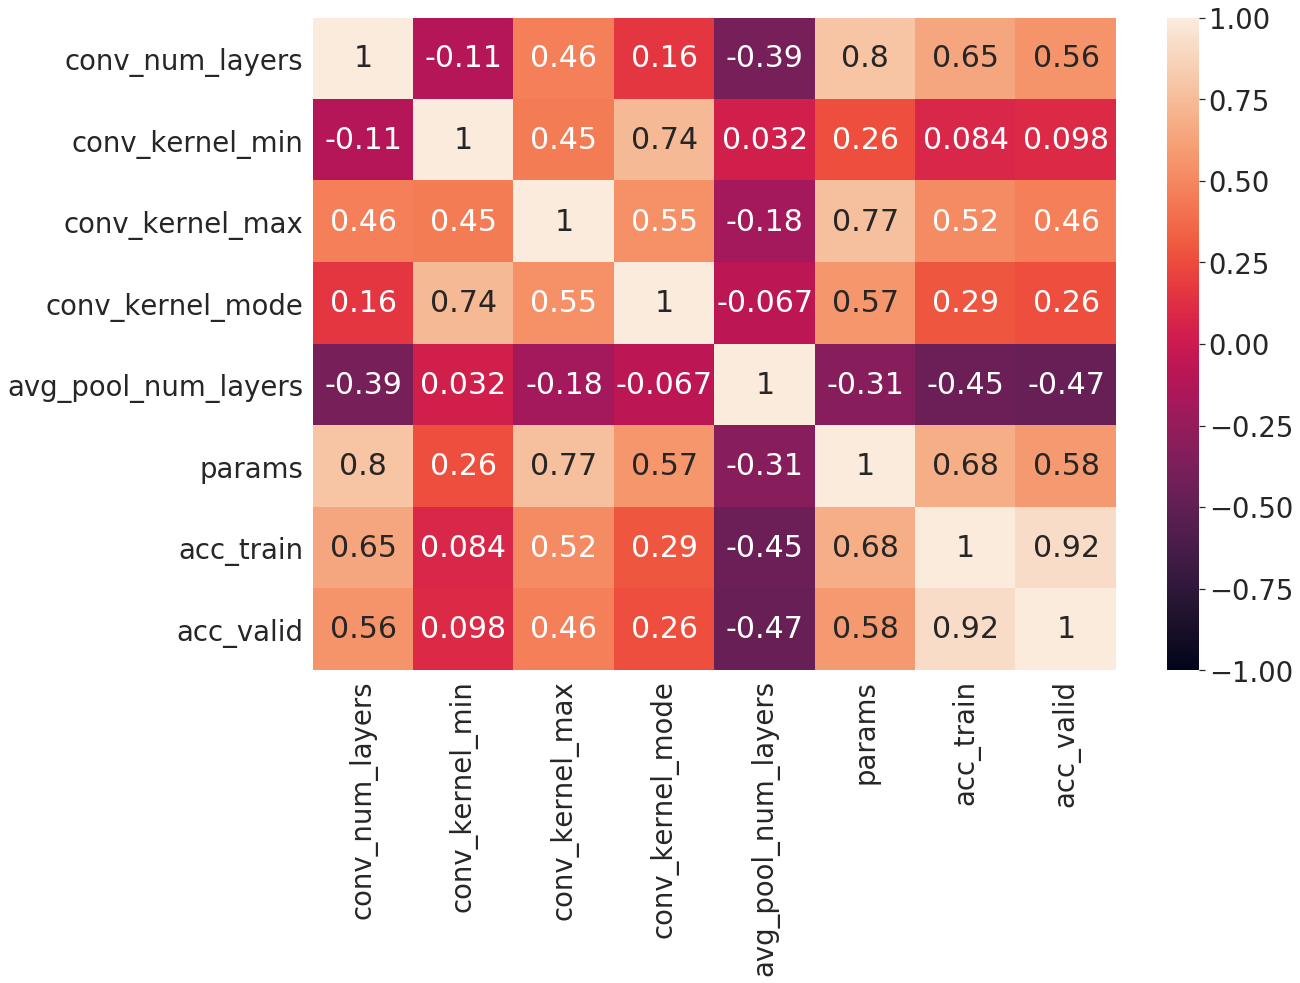

In [41]:
plt.figure(figsize=(18, 12))
df_aux = df_whole.drop(['id_arch', 'dataset', 'epoch', 'time_test', 'loss_test', 'acc_test', 'skip_connection_num_layers',
                       'zeroize_num_layers', 'flops', 'latency', 'time_train', 'time_valid', 'loss_train', 'loss_valid'], 
                       axis = 1)
sns.heatmap(df_aux.corr(method='spearman'), vmin=-1, vmax=1, annot=True)

plt.savefig("/home/gean/nns_performance_prediction/meta_datasets/nasbench201_cifar10valid_108epochs_features_spearman_corr.pdf", 
            transparent=True, bbox_inches='tight')  

## Subset 200

In [42]:
df_whole = pd.read_csv('/home/gean/nns_performance_prediction/meta_datasets/nasbench201_cifar10valid_200epochs.csv', 
                       index_col=0)
df_whole = df_whole.reset_index(drop=True)
df_whole.head()

,id_arch,str_arch,layers_all,adjacency_matrix,dataset,epoch,conv_num_layers,conv_kernel_min,conv_kernel_max,conv_kernel_mode,...,latency,time_train,time_valid,time_test,loss_train,loss_valid,loss_test,acc_train,acc_valid,acc_test
0,0,|avg_pool_3x3~0|+|nor_conv_1x1~0|skip_connect~...,"['avg_pool_3x3', 'nor_conv_1x1', 'skip_connect...",[[0. 0. 0. 0.]\n [4. 0. 0. 0.]\n [2. 1. 0. 0.]...,cifar10-valid,200,2,1,1,1,...,0.013936,1444.218600,509.795847,203.918339,0.319028,0.565851,0.576100,88.918667,81.982667,81.520000
1,1,|nor_conv_3x3~0|+|nor_conv_3x3~0|avg_pool_3x3~...,"['nor_conv_3x3', 'nor_conv_3x3', 'avg_pool_3x3...",[[0. 0. 0. 0.]\n [3. 0. 0. 0.]\n [3. 4. 0. 0.]...,cifar10-valid,200,3,3,3,3,...,0.016853,2169.641376,750.839795,300.335918,0.001767,0.438930,0.457183,99.985333,90.769333,90.513333
2,2,|avg_pool_3x3~0|+|nor_conv_3x3~0|nor_conv_3x3~...,"['avg_pool_3x3', 'nor_conv_3x3', 'nor_conv_3x3...",[[0. 0. 0. 0.]\n [4. 0. 0. 0.]\n [3. 3. 0. 0.]...,cifar10-valid,200,2,3,3,3,...,0.014428,2267.177677,794.849396,317.939758,0.308339,0.566159,0.570830,89.314667,81.910667,81.840000
3,3,|avg_pool_3x3~0|+|skip_connect~0|none~1|+|none...,"['avg_pool_3x3', 'skip_connect', 'none', 'none...",[[0. 0. 0. 0.]\n [4. 0. 0. 0.]\n [1. 0. 0. 0.]...,cifar10-valid,200,0,0,0,0,...,0.009291,833.048987,487.311971,194.924788,0.262831,0.476877,0.491334,91.240000,84.377333,83.883333
4,4,|skip_connect~0|+|skip_connect~0|nor_conv_1x1~...,"['skip_connect', 'skip_connect', 'nor_conv_1x1...",[[0. 0. 0. 0.]\n [1. 0. 0. 0.]\n [1. 2. 0. 0.]...,cifar10-valid,200,2,1,1,1,...,0.013826,1296.859813,482.632035,193.052814,0.255936,0.459336,0.478734,91.292000,85.125333,84.496667


In [43]:
df_whole.describe()

,id_arch,epoch,conv_num_layers,conv_kernel_min,conv_kernel_max,conv_kernel_mode,avg_pool_num_layers,skip_connection_num_layers,zeroize_num_layers,flops,...,latency,time_train,time_valid,time_test,loss_train,loss_valid,loss_test,acc_train,acc_valid,acc_test
count,15625.000000,15625.0,15625.000000,15625.000000,15625.000000,15625.000000,15625.000000,15625.000000,15625.000000,15625.000000,...,15625.000000,15625.000000,15625.000000,15625.000000,15625.000000,15625.000000,15625.000000,15625.000000,15625.000000,15625.000000
mean,7812.000000,200.0,2.400000,1.384320,2.429056,1.698048,1.200000,1.200000,1.200000,54.896534,...,0.015934,1827.986908,632.225897,252.890359,0.166269,0.616496,0.627494,94.155723,83.673548,83.393957
std,4510.693313,0.0,1.200038,0.872327,0.977722,1.024139,0.979827,0.979827,0.979827,33.828605,...,0.002836,471.669036,105.687822,42.275129,0.391440,0.294207,0.291800,14.919111,12.805262,12.714136
min,0.000000,200.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.783050,...,0.007145,542.230968,351.133738,140.453495,0.001308,0.389405,0.399523,10.288000,9.712000,10.000000
25%,3906.000000,200.0,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,19.579530,...,0.014283,1489.199869,549.930453,219.972181,0.005684,0.492795,0.503335,96.176000,84.380000,84.080000
50%,7812.000000,200.0,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,47.104650,...,0.015796,1817.124784,628.876161,251.550464,0.013962,0.544007,0.552519,99.704000,87.296000,86.975000
75%,11718.000000,200.0,3.000000,1.000000,3.000000,3.000000,2.000000,2.000000,2.000000,82.494090,...,0.017864,2158.536959,703.988416,281.595366,0.124210,0.609847,0.622344,99.933333,88.953333,88.665000
max,15624.000000,200.0,6.000000,3.000000,3.000000,3.000000,6.000000,6.000000,6.000000,220.119690,...,0.025579,3460.831539,1070.204902,428.081961,2.302460,2.302960,2.302710,100.000000,91.606667,91.523333


## Validation Acc

In [44]:
y_np = df_whole['acc_valid'].to_numpy()

In [45]:
print("Mean: ", np.mean(y_np))
print("Median: ", np.median(y_np))
print("Q1: ", np.quantile(y_np, 0.25))
print("Q3: ", np.quantile(y_np, 0.75))

Mean:  83.67354764413673
Median:  87.2960000024414
Q1:  84.38000001220703
Q3:  88.9533333203125


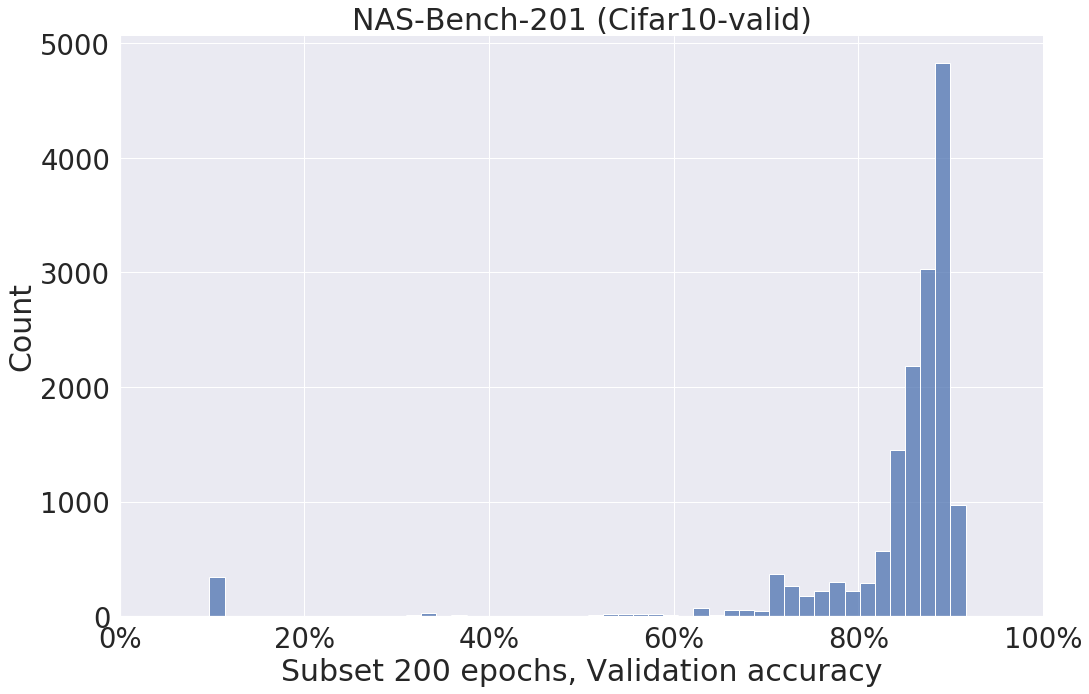

In [46]:
sns.set(font_scale=2.5)

ax = sns.displot(df_whole['acc_valid'], bins=50, height=10, aspect=15.7/10.27).set(xlim=(0, 100))
ax.set(xlabel='Subset 200 epochs, Validation accuracy')
ax.set_xticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
plt.title("NAS-Bench-201 (Cifar10-valid)")
ax.savefig("/home/gean/nns_performance_prediction/meta_datasets/nasbench201_cifar10valid_200epochs_val_acc_dist.pdf", 
           bbox_inches='tight')

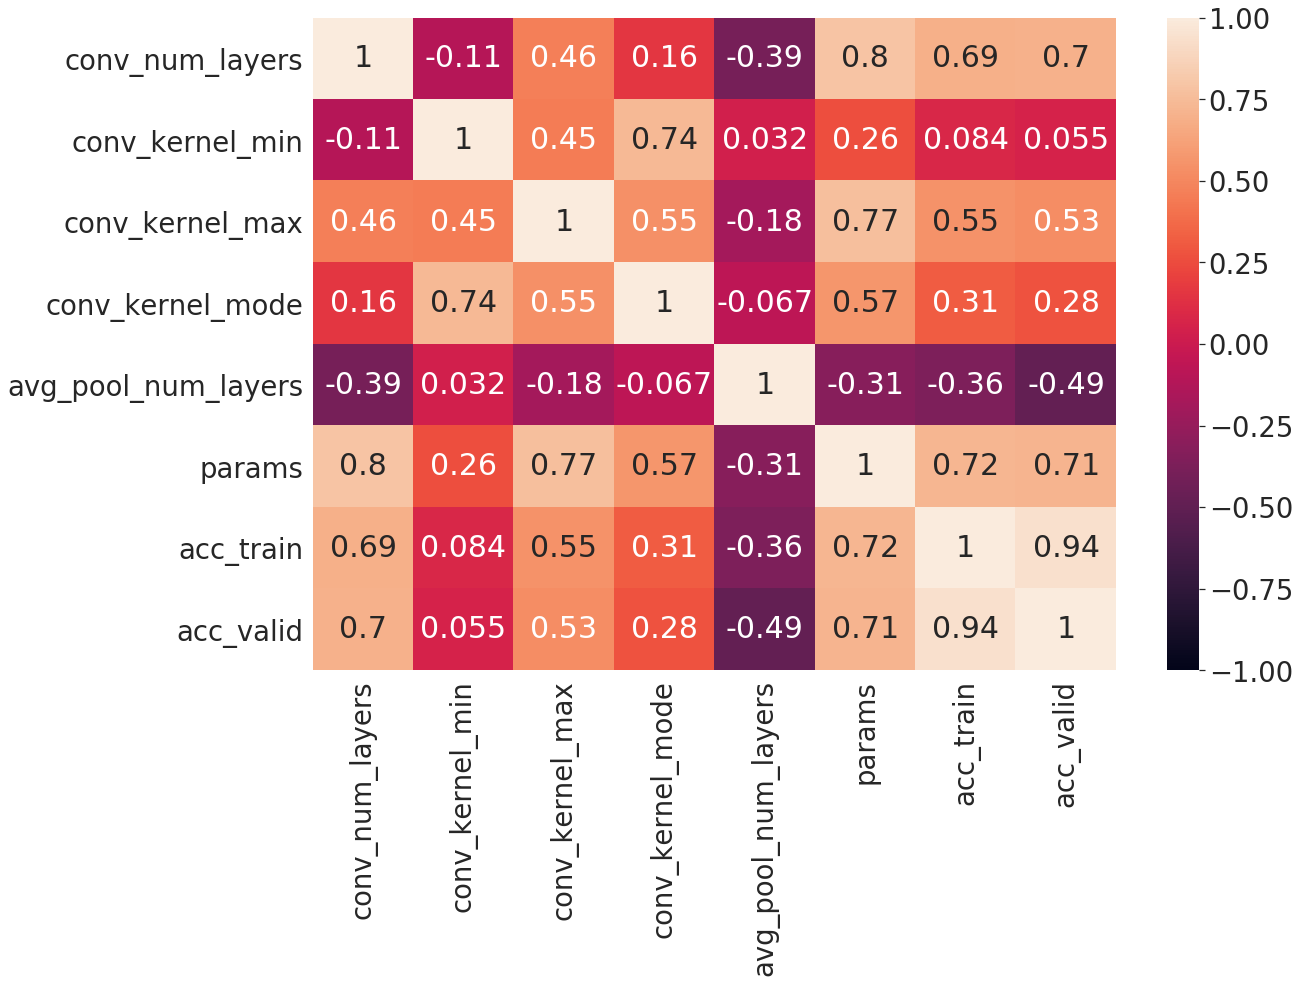

In [47]:
plt.figure(figsize=(18, 12))
df_aux = df_whole.drop(['id_arch', 'dataset', 'epoch', 'time_test', 'loss_test', 'acc_test', 'skip_connection_num_layers',
                       'zeroize_num_layers', 'flops', 'latency', 'time_train', 'time_valid', 'loss_train', 'loss_valid'], 
                       axis = 1)
sns.heatmap(df_aux.corr(method='spearman'), vmin=-1, vmax=1, annot=True)

plt.savefig("/home/gean/nns_performance_prediction/meta_datasets/nasbench201_cifar10valid_200epochs_features_spearman_corr.pdf", 
            transparent=True, bbox_inches='tight')  

## Test Acc

In [48]:
y_np = df_whole['acc_test'].to_numpy()

In [49]:
print("Mean: ", np.mean(y_np))
print("Median: ", np.median(y_np))
print("Q1: ", np.quantile(y_np, 0.25))
print("Q3: ", np.quantile(y_np, 0.75))

Mean:  83.39395669333332
Median:  86.975
Q1:  84.08
Q3:  88.66499999999998


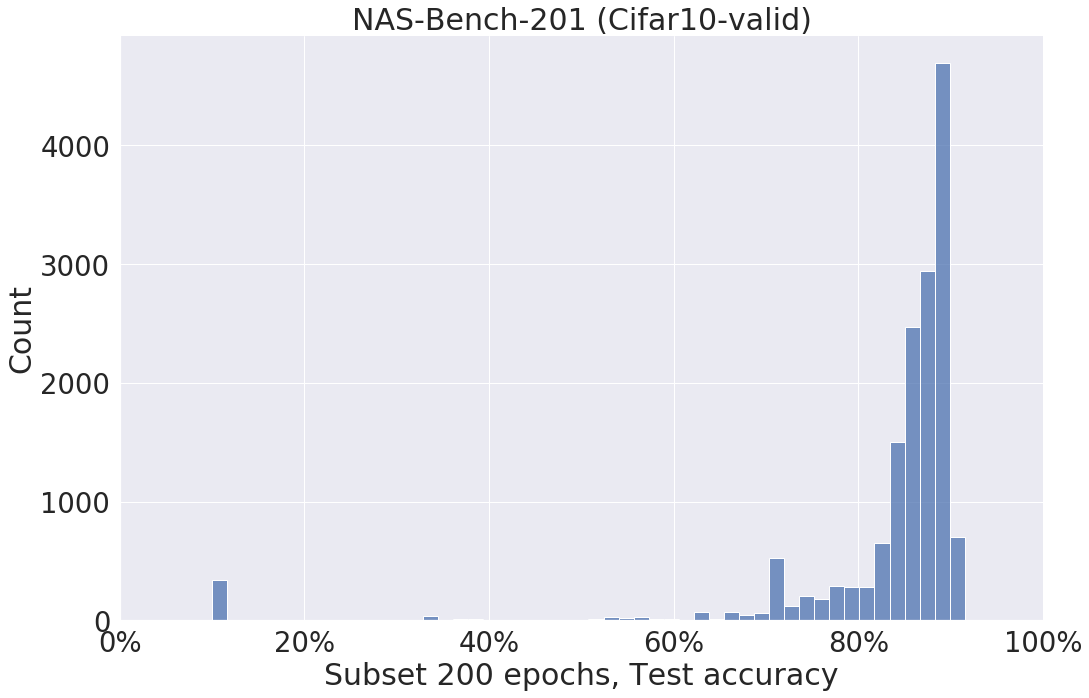

In [50]:
sns.set(font_scale=2.5)

ax = sns.displot(df_whole['acc_test'], bins=50, height=10, aspect=15.7/10.27).set(xlim=(0, 100))
ax.set(xlabel='Subset 200 epochs, Test accuracy')
ax.set_xticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
plt.title("NAS-Bench-201 (Cifar10-valid)")
ax.savefig("/home/gean/nns_performance_prediction/meta_datasets/nasbench201_cifar10valid_200epochs_test_acc_dist.pdf", 
           bbox_inches='tight')

# Cifar100

## Subset 200

In [51]:
df_whole = pd.read_csv('/home/gean/nns_performance_prediction/meta_datasets/nasbench201_cifar100_200epochs.csv', 
                       index_col=0)
df_whole = df_whole.reset_index(drop=True)
df_whole.head()

,id_arch,str_arch,layers_all,adjacency_matrix,dataset,epoch,conv_num_layers,conv_kernel_min,conv_kernel_max,conv_kernel_mode,...,latency,time_train,time_valid,time_test,loss_train,loss_valid,loss_test,acc_train,acc_valid,acc_test
0,0,|avg_pool_3x3~0|+|nor_conv_1x1~0|skip_connect~...,"['avg_pool_3x3', 'nor_conv_1x1', 'skip_connect...",[[0. 0. 0. 0.]\n [4. 0. 0. 0.]\n [2. 1. 0. 0.]...,cifar100,200,2,1,1,1,...,0.013183,2888.437200,101.959169,101.959169,1.510741,1.741787,1.735667,57.730000,52.700000,52.913333
1,1,|nor_conv_3x3~0|+|nor_conv_3x3~0|avg_pool_3x3~...,"['nor_conv_3x3', 'nor_conv_3x3', 'avg_pool_3x3...",[[0. 0. 0. 0.]\n [3. 0. 0. 0.]\n [3. 4. 0. 0.]...,cifar100,200,3,3,3,3,...,0.015363,4339.282751,150.167959,150.167959,0.048054,1.373184,1.350763,99.437333,69.826667,70.293333
2,2,|avg_pool_3x3~0|+|nor_conv_3x3~0|nor_conv_3x3~...,"['avg_pool_3x3', 'nor_conv_3x3', 'nor_conv_3x3...",[[0. 0. 0. 0.]\n [4. 0. 0. 0.]\n [3. 3. 0. 0.]...,cifar100,200,2,3,3,3,...,0.014029,4534.355354,158.969879,158.969879,1.431623,1.701853,1.675738,59.742000,54.300000,54.866667
3,3,|avg_pool_3x3~0|+|skip_connect~0|none~1|+|none...,"['avg_pool_3x3', 'skip_connect', 'none', 'none...",[[0. 0. 0. 0.]\n [4. 0. 0. 0.]\n [1. 0. 0. 0.]...,cifar100,200,0,0,0,0,...,0.009306,1666.097975,97.462394,97.462394,1.338988,1.539061,1.515398,62.856000,57.413333,58.306667
4,4,|skip_connect~0|+|skip_connect~0|nor_conv_1x1~...,"['skip_connect', 'skip_connect', 'nor_conv_1x1...",[[0. 0. 0. 0.]\n [1. 0. 0. 0.]\n [1. 2. 0. 0.]...,cifar100,200,2,1,1,1,...,0.012342,2593.719625,96.526407,96.526407,1.204578,1.434420,1.416914,66.002667,59.566667,60.140000


In [52]:
df_whole.describe()

,id_arch,epoch,conv_num_layers,conv_kernel_min,conv_kernel_max,conv_kernel_mode,avg_pool_num_layers,skip_connection_num_layers,zeroize_num_layers,flops,...,latency,time_train,time_valid,time_test,loss_train,loss_valid,loss_test,acc_train,acc_valid,acc_test
count,15625.000000,15625.0,15625.000000,15625.000000,15625.000000,15625.000000,15625.000000,15625.000000,15625.000000,15625.000000,...,15625.000000,15625.000000,15625.000000,15625.000000,15625.000000,15625.000000,15625.000000,15625.000000,15625.000000,15625.000000
mean,7812.000000,200.0,2.400000,1.384320,2.429056,1.698048,1.200000,1.200000,1.200000,54.902384,...,0.015074,3655.973815,126.445179,126.445179,0.753760,1.547954,1.545200,79.970166,61.281745,61.387852
std,4510.693313,0.0,1.200038,0.872327,0.977722,1.024139,0.979827,0.979827,0.979827,33.828605,...,0.002898,943.338071,21.137564,21.137564,0.834705,0.547972,0.548929,20.095007,12.143195,12.172301
min,0.000000,200.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.788900,...,0.007203,1084.461935,70.226748,70.226748,0.012843,1.160087,1.174757,1.000000,1.000000,1.000000
25%,3906.000000,200.0,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,19.585380,...,0.013153,2978.399738,109.986091,109.986091,0.218980,1.304663,1.303932,71.625000,59.006667,59.190000
50%,7812.000000,200.0,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,47.110500,...,0.015000,3634.249568,125.775232,125.775232,0.422400,1.387468,1.381667,87.848667,65.153333,65.273333
75%,11718.000000,200.0,3.000000,1.000000,3.000000,3.000000,2.000000,2.000000,2.000000,82.499940,...,0.017044,4317.073917,140.797683,140.797683,0.994477,1.536315,1.520499,94.574667,67.740000,67.873333
max,15624.000000,200.0,6.000000,3.000000,3.000000,3.000000,6.000000,6.000000,6.000000,220.125540,...,0.026141,6921.663078,214.040980,214.040980,4.605171,4.605171,4.605171,99.937333,73.493333,73.513333


## Validation Acc

In [53]:
y_np = df_whole['acc_valid'].to_numpy()

In [54]:
print("Mean: ", np.mean(y_np))
print("Median: ", np.median(y_np))
print("Q1: ", np.quantile(y_np, 0.25))
print("Q3: ", np.quantile(y_np, 0.75))

Mean:  61.28174504349649
Median:  65.15333330281577
Q1:  59.00666664428712
Q3:  67.73999997558593


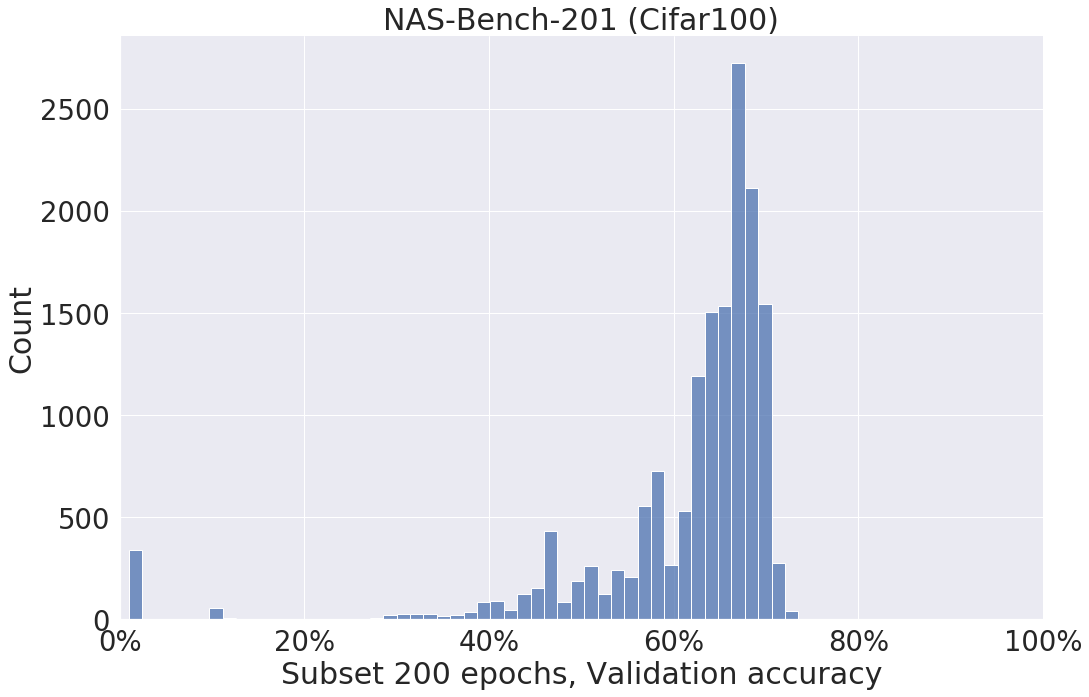

In [55]:
sns.set(font_scale=2.5)

ax = sns.displot(df_whole['acc_valid'], bins=50, height=10, aspect=15.7/10.27).set(xlim=(0, 100))
ax.set(xlabel='Subset 200 epochs, Validation accuracy')
ax.set_xticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
plt.title("NAS-Bench-201 (Cifar100)")
ax.savefig("/home/gean/nns_performance_prediction/meta_datasets/nasbench201_cifar100_200epochs_val_acc_dist.pdf", 
           bbox_inches='tight')

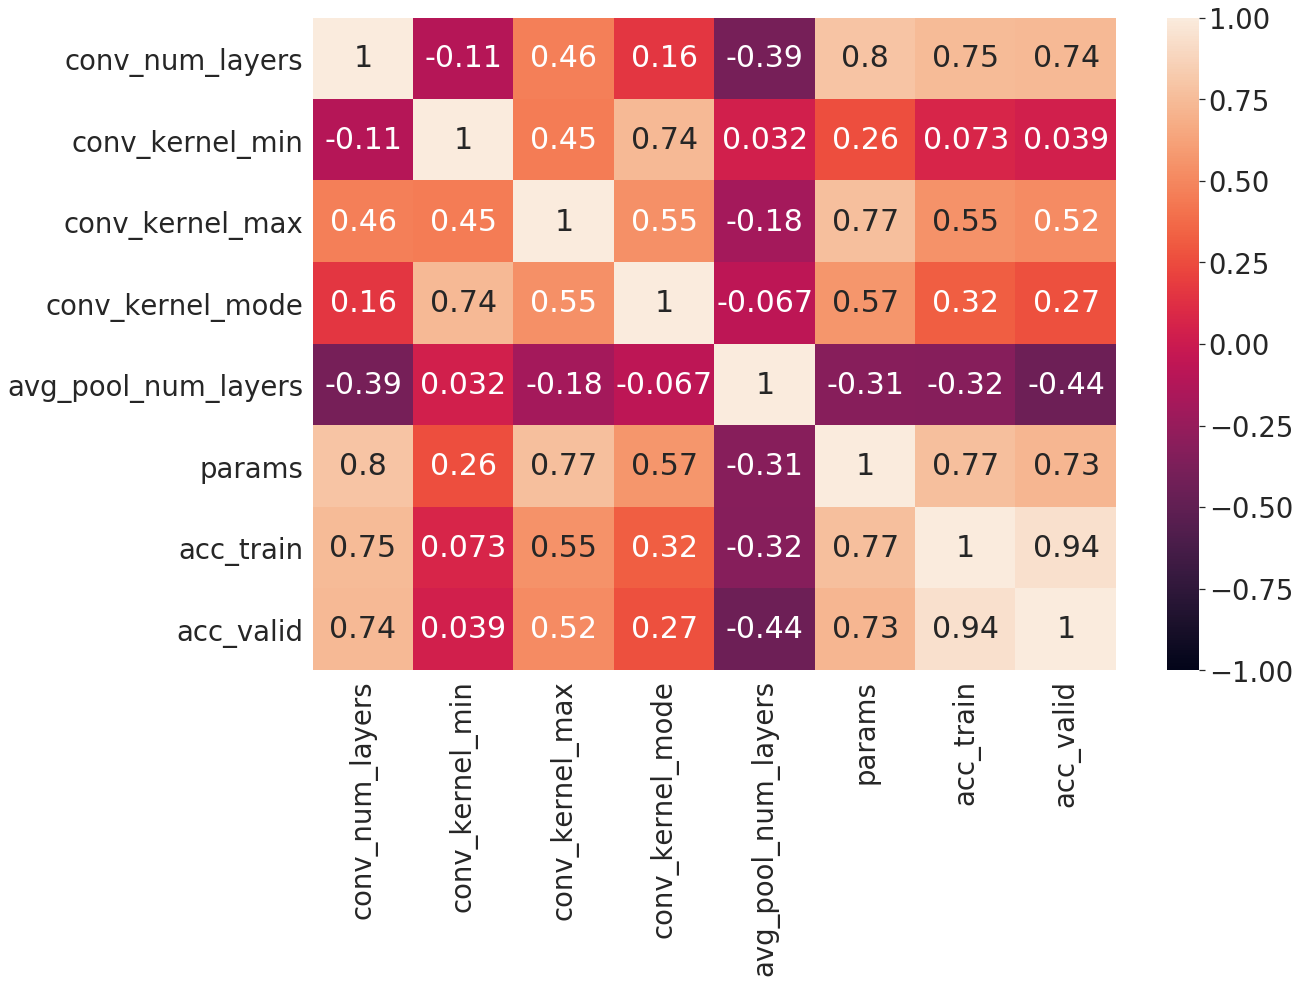

In [56]:
plt.figure(figsize=(18, 12))
df_aux = df_whole.drop(['id_arch', 'dataset', 'epoch', 'time_test', 'loss_test', 'acc_test', 'skip_connection_num_layers',
                       'zeroize_num_layers', 'flops', 'latency', 'time_train', 'time_valid', 'loss_train', 'loss_valid'], 
                       axis = 1)
sns.heatmap(df_aux.corr(method='spearman'), vmin=-1, vmax=1, annot=True)

plt.savefig("/home/gean/nns_performance_prediction/meta_datasets/nasbench201_cifar100_200epochs_features_spearman_corr.pdf", 
            transparent=True, bbox_inches='tight')  

## Test Acc

In [57]:
y_np = df_whole['acc_test'].to_numpy()

In [58]:
print("Mean: ", np.mean(y_np))
print("Median: ", np.median(y_np))
print("Q1: ", np.quantile(y_np, 0.25))
print("Q3: ", np.quantile(y_np, 0.75))

Mean:  61.38785192321945
Median:  65.27333333333333
Q1:  59.18999998474121
Q3:  67.87333332926433


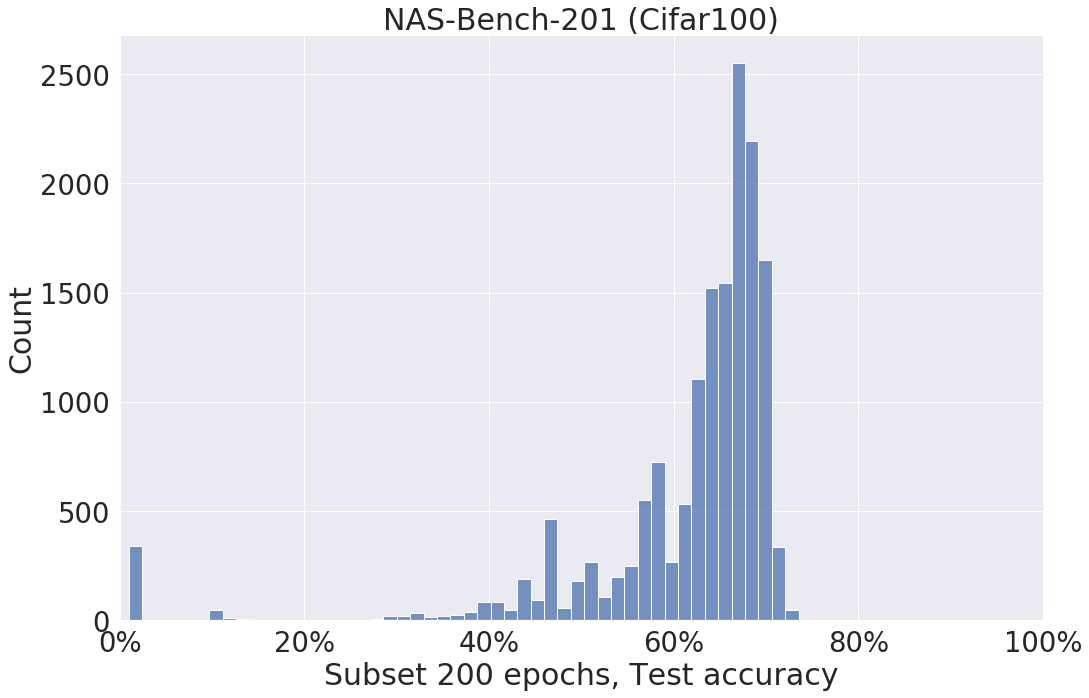

In [59]:
sns.set(font_scale=2.5)

ax = sns.displot(df_whole['acc_test'], bins=50, height=10, aspect=15.7/10.27).set(xlim=(0, 100))
ax.set(xlabel='Subset 200 epochs, Test accuracy')
ax.set_xticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
plt.title("NAS-Bench-201 (Cifar100)")
ax.savefig("/home/gean/nns_performance_prediction/meta_datasets/nasbench201_cifar100_200epochs_test_acc_dist.pdf", 
           bbox_inches='tight')

# ImageNet16-120

## Subset 200

In [60]:
df_whole = pd.read_csv('/home/gean/nns_performance_prediction/meta_datasets/nasbench201_imagenet16_120_200epochs.csv', 
                       index_col=0)
df_whole = df_whole.reset_index(drop=True)
df_whole.head()

,id_arch,str_arch,layers_all,adjacency_matrix,dataset,epoch,conv_num_layers,conv_kernel_min,conv_kernel_max,conv_kernel_mode,...,latency,time_train,time_valid,time_test,loss_train,loss_valid,loss_test,acc_train,acc_valid,acc_test
0,0,|avg_pool_3x3~0|+|nor_conv_1x1~0|skip_connect~...,"['avg_pool_3x3', 'nor_conv_1x1', 'skip_connect...",[[0. 0. 0. 0.]\n [4. 0. 0. 0.]\n [2. 1. 0. 0.]...,ImageNet16-120,200,2,1,1,1,...,0.012977,8763.518464,61.175502,61.175502,2.925081,2.943649,2.989456,28.135135,28.211111,26.633333
1,1,|nor_conv_3x3~0|+|nor_conv_3x3~0|avg_pool_3x3~...,"['nor_conv_3x3', 'nor_conv_3x3', 'avg_pool_3x3...",[[0. 0. 0. 0.]\n [3. 0. 0. 0.]\n [3. 4. 0. 0.]...,ImageNet16-120,200,3,3,3,3,...,0.013774,13165.383867,90.100775,90.100775,1.459219,2.229761,2.266221,60.336190,44.488889,44.033333
2,2,|avg_pool_3x3~0|+|nor_conv_3x3~0|nor_conv_3x3~...,"['avg_pool_3x3', 'nor_conv_3x3', 'nor_conv_3x3...",[[0. 0. 0. 0.]\n [4. 0. 0. 0.]\n [3. 3. 0. 0.]...,ImageNet16-120,200,2,3,3,3,...,0.012761,13757.234145,95.381927,95.381927,2.973894,2.973391,3.015747,27.219952,27.633333,27.255556
3,3,|avg_pool_3x3~0|+|skip_connect~0|none~1|+|none...,"['avg_pool_3x3', 'skip_connect', 'none', 'none...",[[0. 0. 0. 0.]\n [4. 0. 0. 0.]\n [1. 0. 0. 0.]...,ImageNet16-120,200,0,0,0,0,...,0.008155,5054.941255,58.477436,58.477436,2.928704,2.906529,2.972386,28.455944,29.433333,28.044444
4,4,|skip_connect~0|+|skip_connect~0|nor_conv_1x1~...,"['skip_connect', 'skip_connect', 'nor_conv_1x1...",[[0. 0. 0. 0.]\n [1. 0. 0. 0.]\n [1. 2. 0. 0.]...,ImageNet16-120,200,2,1,1,1,...,0.011799,7869.345344,57.915844,57.915844,2.732304,2.746641,2.783470,32.191387,32.144444,31.488889


In [61]:
df_whole.describe()

,id_arch,epoch,conv_num_layers,conv_kernel_min,conv_kernel_max,conv_kernel_mode,avg_pool_num_layers,skip_connection_num_layers,zeroize_num_layers,flops,...,latency,time_train,time_valid,time_test,loss_train,loss_valid,loss_test,acc_train,acc_valid,acc_test
count,15625.000000,15625.0,15625.000000,15625.000000,15625.000000,15625.000000,15625.000000,15625.000000,15625.000000,15625.000000,...,15625.000000,15625.000000,15625.000000,15625.000000,15624.000000,15624.000000,15624.000000,15625.000000,15625.000000,15625.000000
mean,7812.000000,200.0,2.400000,1.384320,2.429056,1.698048,1.200000,1.200000,1.200000,13.731771,...,0.014465,11092.224556,75.867108,75.867108,2.465146,2.689057,2.712018,38.268099,33.792890,33.568327
std,4510.693313,0.0,1.200038,0.872327,0.977722,1.024139,0.979827,0.979827,0.979827,8.457151,...,0.003203,2862.087708,12.682539,12.682539,0.655919,0.511831,0.513958,12.637926,9.242380,9.514037
min,0.000000,200.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.953400,...,0.005842,3290.257512,42.136049,42.136049,0.952430,2.091540,2.106454,0.844650,0.833333,0.833333
25%,3906.000000,200.0,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,4.902520,...,0.012246,9036.464804,65.991654,65.991654,2.011198,2.368888,2.388688,31.257746,30.133333,29.444444
50%,7812.000000,200.0,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,11.783800,...,0.014302,11026.313189,75.465139,75.465139,2.312570,2.518128,2.542234,40.635684,36.550000,36.366667
75%,11718.000000,200.0,3.000000,1.000000,3.000000,3.000000,2.000000,2.000000,2.000000,20.631160,...,0.016468,13098.002265,84.478610,84.478610,2.760563,2.837597,2.878632,47.289607,40.088889,40.177778
max,15624.000000,200.0,6.000000,3.000000,3.000000,3.000000,6.000000,6.000000,6.000000,55.037560,...,0.028224,21000.325778,128.424588,128.424588,4.782548,4.792365,4.792364,73.229180,46.733333,47.311111


## Validation Acc

In [62]:
y_np = df_whole['acc_valid'].to_numpy()

In [63]:
print("Mean: ", np.mean(y_np))
print("Median: ", np.median(y_np))
print("Q1: ", np.quantile(y_np, 0.25))
print("Q3: ", np.quantile(y_np, 0.75))

Mean:  33.79289026660551
Median:  36.54999991353353
Q1:  30.133333318074545
Q3:  40.088888834635405


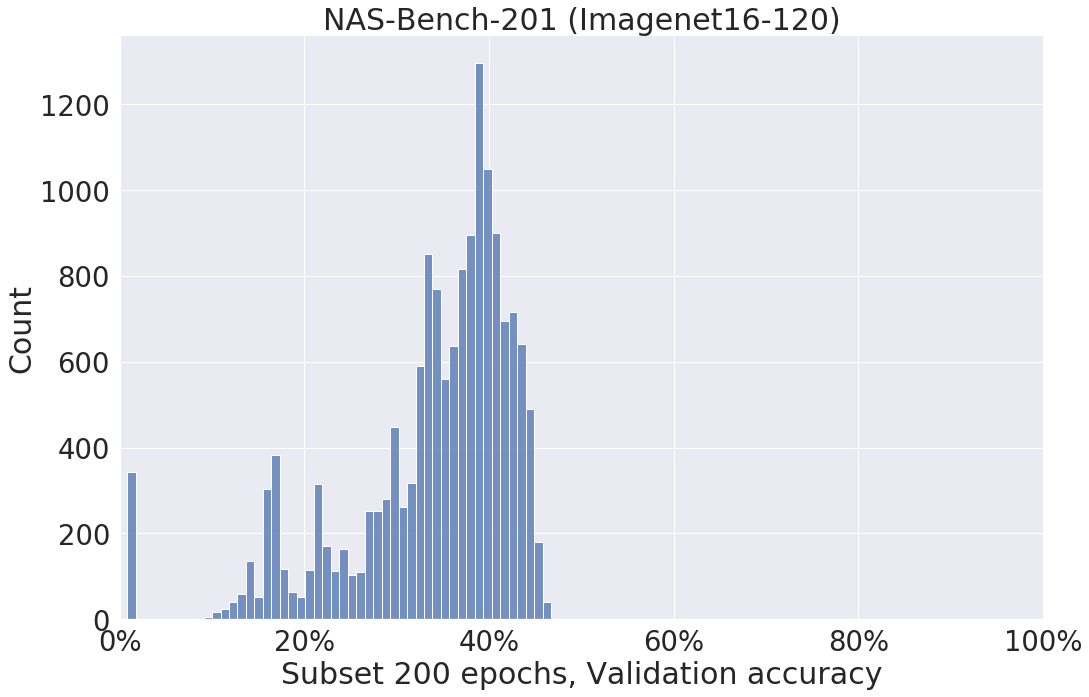

In [64]:
sns.set(font_scale=2.5)

ax = sns.displot(df_whole['acc_valid'], bins=50, height=10, aspect=15.7/10.27).set(xlim=(0, 100))
ax.set(xlabel='Subset 200 epochs, Validation accuracy')
ax.set_xticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
plt.title("NAS-Bench-201 (Imagenet16-120)")
ax.savefig("/home/gean/nns_performance_prediction/meta_datasets/nasbench201_imagenet16_120_200epochs_val_acc_dist.pdf", 
           bbox_inches='tight')

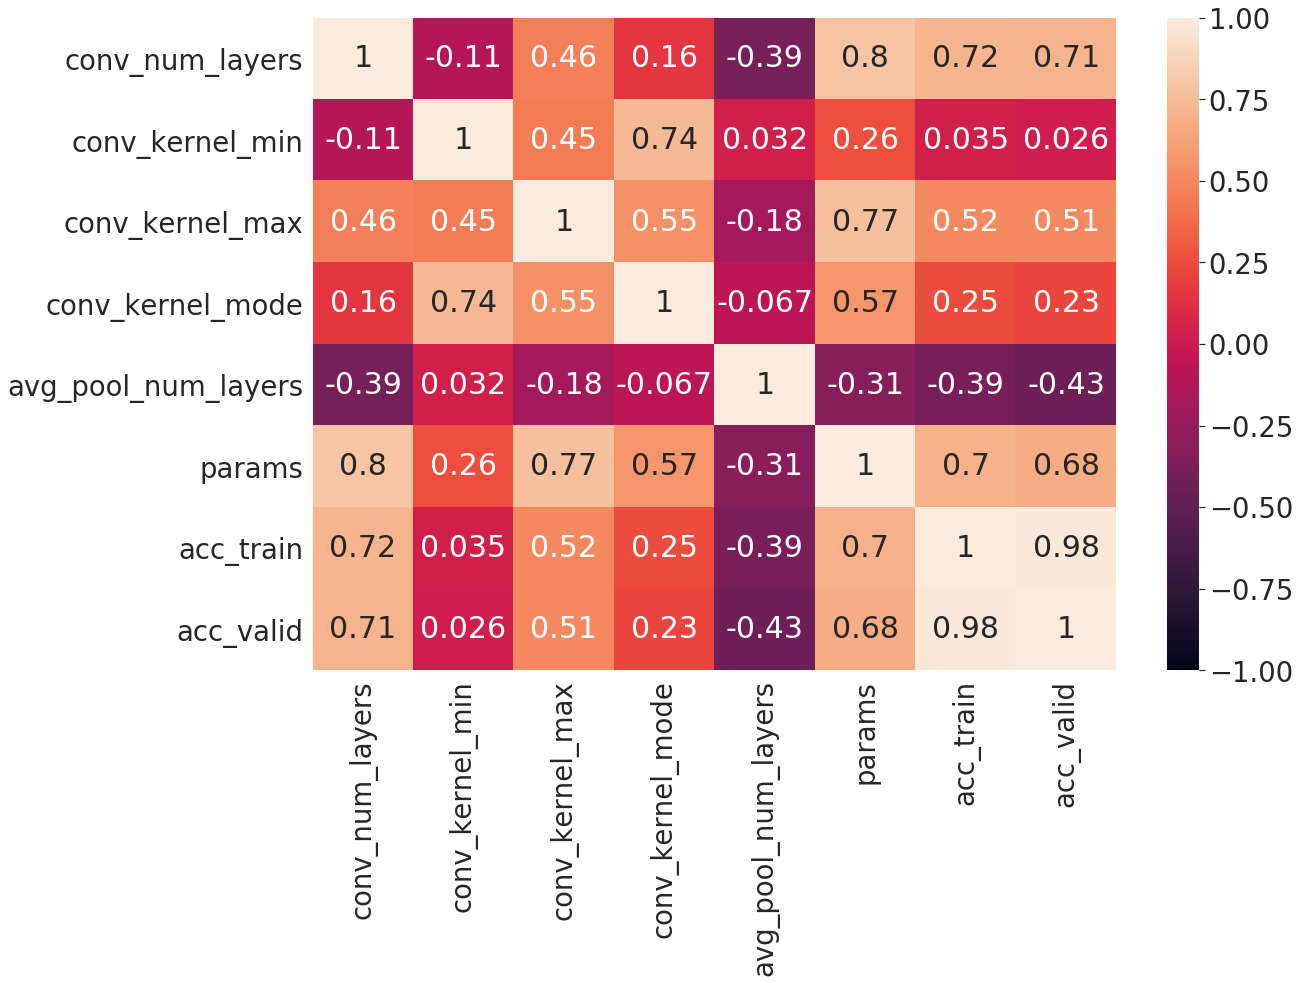

In [65]:
plt.figure(figsize=(18, 12))
df_aux = df_whole.drop(['id_arch', 'dataset', 'epoch', 'time_test', 'loss_test', 'acc_test', 'skip_connection_num_layers',
                       'zeroize_num_layers', 'flops', 'latency', 'time_train', 'time_valid', 'loss_train', 'loss_valid'], 
                       axis = 1)
sns.heatmap(df_aux.corr(method='spearman'), vmin=-1, vmax=1, annot=True)

plt.savefig("/home/gean/nns_performance_prediction/meta_datasets/nasbench201_imagenet16_120_200epochs_features_spearman_corr.pdf", 
            transparent=True, bbox_inches='tight')  

## Test Acc

In [66]:
y_np = df_whole['acc_test'].to_numpy()

In [67]:
print("Mean: ", np.mean(y_np))
print("Median: ", np.median(y_np))
print("Q1: ", np.quantile(y_np, 0.25))
print("Q3: ", np.quantile(y_np, 0.75))

Mean:  33.56832671192747
Median:  36.3666666208903
Q1:  29.44444434950087
Q3:  40.17777768961589


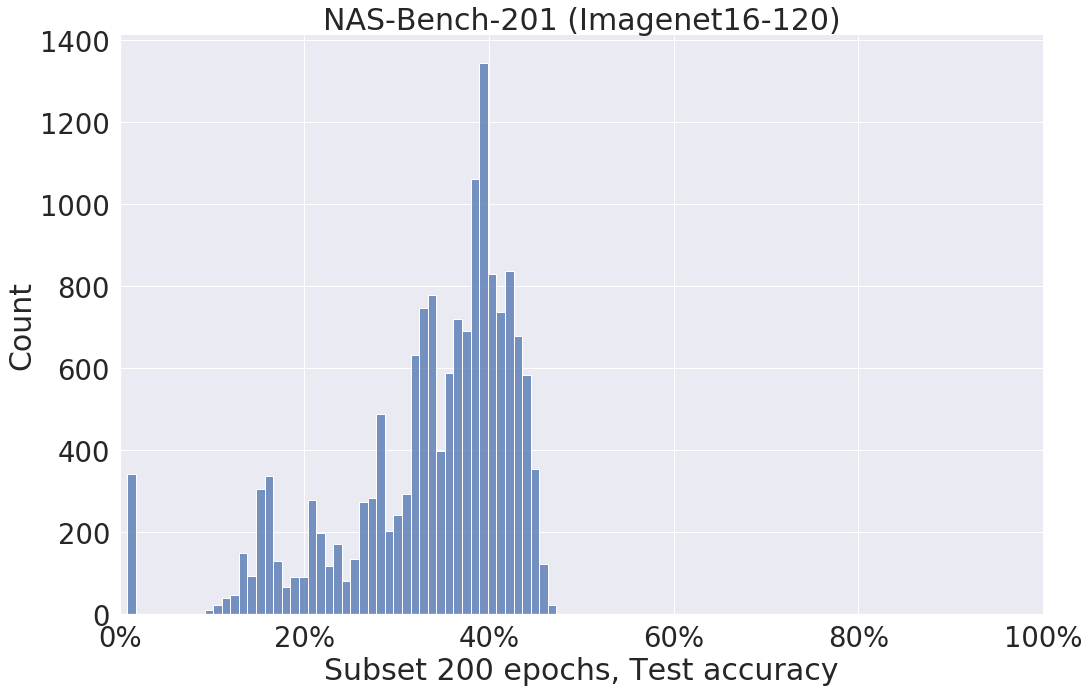

In [68]:
sns.set(font_scale=2.5)

ax = sns.displot(df_whole['acc_test'], bins=50, height=10, aspect=15.7/10.27).set(xlim=(0, 100))
ax.set(xlabel='Subset 200 epochs, Test accuracy')
ax.set_xticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
plt.title("NAS-Bench-201 (Imagenet16-120)")
ax.savefig("/home/gean/nns_performance_prediction/meta_datasets/nasbench201_imagenet16_120_200epochs_test_acc_dist.pdf", 
           bbox_inches='tight')